In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs 
from urllib.request import urlopen

# Pandas Dataframe

In [2]:
my_dict={'name':['Alice','Bob','Kim'], 'age':[21,29,24], 'height':[167,188,173]}
my_table=pd.DataFrame(my_dict)
print(my_table['name'])

0    Alice
1      Bob
2      Kim
Name: name, dtype: object


In [3]:
my_table.loc[0]

name      Alice
age          21
height      167
Name: 0, dtype: object

In [4]:
my_table['name'][1]

'Bob'

In [5]:
my_table.columns

Index(['name', 'age', 'height'], dtype='object')

In [6]:
len(my_table)

3

In [7]:
house=pd.read_csv('/content/sample_data/california_housing_train.csv')
house

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/california_housing_train.csv'

In [ ]:
house['housing_median_age']

In [ ]:
house.columns

In [ ]:
house.isna().sum()

In [ ]:
house=house.dropna()
house=house.reset_index(drop=True)
house

In [ ]:
house.describe()

In [ ]:
plt.hist(house['median_house_value'])

In [ ]:
plt.scatter(house['total_rooms'],house['median_house_value'])

In [ ]:
import seaborn as sns
sns.pairplot(house,vars=['housing_median_age','total_rooms','median_income','median_house_value'])
plt.savefig('house.png',dpi=200)

In [ ]:
del house['longitude'] # drop column
del house['latitude']
house

In [ ]:
house['age']=house['housing_median_age'].apply(int)
house['price']=house['median_house_value'].apply(lambda x: int(x/100))
del house['housing_median_age']
del house['median_house_value']
house

In [ ]:
old_income=house[house['age']>30]['median_income']*100
new_income=house[house['age']<=30]['median_income']*100
old_price=house[house['age']>30]['price']
new_price=house[house['age']<=30]['price']

plt.figure(figsize=(8,5))
plt.scatter(old_income,old_price,c='r',label='>30 years',s=5,alpha=0.2)
plt.scatter(new_income,new_price,c='b',label='<=30 years',s=5,alpha=0.2)
# c: color, s: size, alpha: transparancy
plt.xlabel('Median income(100$)',fontsize=13)
plt.ylabel('Median house value(100$)',fontsize=13)
plt.legend()
plt.savefig('house2.png',dpi=200)

# Web crawling

In [15]:
from bs4 import BeautifulSoup as bs 
from urllib.request import urlopen

target_url = 'https://sites.google.com/view/compsysbdai/publicatations'
response = urlopen(target_url)
html = response.read()

soup = bs(html, 'html.parser')
print(soup)

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="en-US"><head><meta charset="utf-8"/><script nonce="HytNqaItMt6icwns7XuR5Q">var DOCS_timing={}; DOCS_timing['sl']=new Date().getTime();</script><script nonce="HytNqaItMt6icwns7XuR5Q">function _DumpException(e) {throw e;}</script><script nonce="HytNqaItMt6icwns7XuR5Q">_docs_flag_initialData={"atari-emtpr":false,"atari-ebidm":true,"atari-ebids":true,"atari-edtm":true,"atari-eibrm":false,"atari-ectm":false,"atari-ects":false,"atari-ebam":false,"docs-text-elei":false,"docs-text-usc":true,"atari-bae":false,"docs-text-etsrdpn":false,"docs-text-etsrds":false,"docs-text-erdfs":false,"docs-text-encps":false,"docs-text-eeves":false,"docs-text-endes":false,"docs-text-etocls":false,"docs-text-escpv":true,"docs-text-efts":false,"docs-text-ecfs":false,"docs-text-ecss":false,"docs-text-evs":false,"docs-text-etvs":false,"docs-text-etvls":false,"docs-text-ethples":false,"docs-text-echs":false,"docs-text-eessips":false,"docs-te

In [16]:
table=soup.find_all('span',{'class':"C9DxTc"}) # returns list of html codes
print(table)

[<span class="Rn3Z1b C9DxTc" style="vertical-align: baseline;">Publicatations</span>, <span class="C9DxTc" style="">Recent Publications</span>, <span class="C9DxTc" style="">Jihun Park, Chang Hee Cho, Jae Woo Lee, "A perspective on complex networks in the stock market", Front. Phys. 10, 1097489 (2022).</span>, <span class="C9DxTc" style="">Biseko Juman Mafwele, Jae Woo Lee, "Relationships between transmission of malaria in Africa and climate factors", Sci. Rep.  12, 14392 (2022).</span>, <span class="C9DxTc" style="">KyoungEun Lee, Nam Jung, Hyun Min Lee, Seung Eun Maeng, Jae Woo Lee, "Emergence and structure of complex mutualistic networks", PNIE 3, 149 (2022). </span>, <span class="C9DxTc" style="">Hyun Woo Lee, Jae Woo Lee, Deok-Sun Lee, "Stability and selective extinction in complex mutualistic networks", Phys. Rev. E 105, 014309 (2022).</span>, <span class="C9DxTc" style=""> Jae Han Choi, Sungmin Lee, Jae Woo Lee, "Enhancement of cooperation and reentrant phase of prisoner's dilem

In [17]:
for t in table:
  print(t)

<span class="Rn3Z1b C9DxTc" style="vertical-align: baseline;">Publicatations</span>
<span class="C9DxTc" style="">Recent Publications</span>
<span class="C9DxTc" style="">Jihun Park, Chang Hee Cho, Jae Woo Lee, "A perspective on complex networks in the stock market", Front. Phys. 10, 1097489 (2022).</span>
<span class="C9DxTc" style="">Biseko Juman Mafwele, Jae Woo Lee, "Relationships between transmission of malaria in Africa and climate factors", Sci. Rep.  12, 14392 (2022).</span>
<span class="C9DxTc" style="">KyoungEun Lee, Nam Jung, Hyun Min Lee, Seung Eun Maeng, Jae Woo Lee, "Emergence and structure of complex mutualistic networks", PNIE 3, 149 (2022). </span>
<span class="C9DxTc" style="">Hyun Woo Lee, Jae Woo Lee, Deok-Sun Lee, "Stability and selective extinction in complex mutualistic networks", Phys. Rev. E 105, 014309 (2022).</span>
<span class="C9DxTc" style=""> Jae Han Choi, Sungmin Lee, Jae Woo Lee, "Enhancement of cooperation and reentrant phase of prisoner's dilemma game

In [18]:
import re
for t in table:
  a=str(t) # converting into string data type
  b=re.split(';|\xa0|>|</span|, ',a) # split with ;, \xa0, >, <,   /span, and , 
  print(b)

['<span class="Rn3Z1b C9DxTc" style="vertical-align: baseline', '"', 'Publicatations', '', '']
['<span class="C9DxTc" style=""', 'Recent Publications', '', '']
['<span class="C9DxTc" style=""', 'Jihun Park', 'Chang Hee Cho', 'Jae Woo Lee', '"A perspective on complex networks in the stock market"', 'Front. Phys. 10', '1097489 (2022).', '', '']
['<span class="C9DxTc" style=""', 'Biseko Juman Mafwele', 'Jae Woo Lee', '"Relationships between transmission of malaria in Africa and climate factors"', 'Sci. Rep.', ' 12', '14392 (2022).', '', '']
['<span class="C9DxTc" style=""', 'KyoungEun Lee', 'Nam Jung', 'Hyun Min Lee', 'Seung Eun Maeng', 'Jae Woo Lee', '"Emergence and structure of complex mutualistic networks"', 'PNIE 3', '149 (2022).', '', '', '']
['<span class="C9DxTc" style=""', 'Hyun Woo Lee', 'Jae Woo Lee', 'Deok-Sun Lee', '"Stability and selective extinction in complex mutualistic networks"', 'Phys. Rev. E 105', '014309 (2022).', '', '']
['<span class="C9DxTc" style=""', '', 'Jae Han

In [19]:
# save strings in list
c=[]
for t in table:
  a=str(t)
  b=re.split(';|\xa0|>|</span|, ',a) 
  c=c+b[2:-2] # merging list by using +
print(c)

['Publicatations', 'Chang Hee Cho', 'Jae Woo Lee', '"A perspective on complex networks in the stock market"', 'Front. Phys. 10', '1097489 (2022).', 'Jae Woo Lee', '"Relationships between transmission of malaria in Africa and climate factors"', 'Sci. Rep.', ' 12', '14392 (2022).', 'Nam Jung', 'Hyun Min Lee', 'Seung Eun Maeng', 'Jae Woo Lee', '"Emergence and structure of complex mutualistic networks"', 'PNIE 3', '149 (2022).', '', 'Jae Woo Lee', 'Deok-Sun Lee', '"Stability and selective extinction in complex mutualistic networks"', 'Phys. Rev. E 105', '014309 (2022).', 'Jae Han Choi', 'Sungmin Lee', 'Jae Woo Lee', '"Enhancement of cooperation and reentrant phase of prisoner\'s dilemma game on signed network"', 'Entropy,', ' 24', '144 (2022).', '이재우', '"인하대의 디지털 트랜스포메이션과 미래사회의 이해 강좌"', '미래연구', '7', '35 (2022).', '조철수', '이재우', '"시스템다이내믹스 관점에서 본 SIR-기반 실업 모델링 연구"', '한국시스템다이내믹스연구', '23', '85 (2022).', 'Kamrul Hasan Tuhin', 'Jae Woo Lee', '"Application of principal component analysis on tempo

In [20]:
#removing unimportant words
words_to_remove=[' font-family: Lato','Arial',' font-weight: 700','"',' font-variant: normal', ' text-decoration: underline',',','']
for word in words_to_remove:
  while word in c:
    c.remove(word)
print(c)

['Publicatations', 'Chang Hee Cho', 'Jae Woo Lee', '"A perspective on complex networks in the stock market"', 'Front. Phys. 10', '1097489 (2022).', 'Jae Woo Lee', '"Relationships between transmission of malaria in Africa and climate factors"', 'Sci. Rep.', ' 12', '14392 (2022).', 'Nam Jung', 'Hyun Min Lee', 'Seung Eun Maeng', 'Jae Woo Lee', '"Emergence and structure of complex mutualistic networks"', 'PNIE 3', '149 (2022).', 'Jae Woo Lee', 'Deok-Sun Lee', '"Stability and selective extinction in complex mutualistic networks"', 'Phys. Rev. E 105', '014309 (2022).', 'Jae Han Choi', 'Sungmin Lee', 'Jae Woo Lee', '"Enhancement of cooperation and reentrant phase of prisoner\'s dilemma game on signed network"', 'Entropy,', ' 24', '144 (2022).', '이재우', '"인하대의 디지털 트랜스포메이션과 미래사회의 이해 강좌"', '미래연구', '7', '35 (2022).', '조철수', '이재우', '"시스템다이내믹스 관점에서 본 SIR-기반 실업 모델링 연구"', '한국시스템다이내믹스연구', '23', '85 (2022).', 'Kamrul Hasan Tuhin', 'Jae Woo Lee', '"Application of principal component analysis on temporal 

In [21]:
coauthors=['Nam Jung', 'Hyun Min Lee', 'Seung Eun Maeng','Jae Han Choi','Kamrul Hasan Tuhin','Ashadun Nobi','Seo Yoon Chae','KyoungEun Lee']
coworks=[]
for author in coauthors:
  coworks.append(c.count(author)) # counting frequencies
coworks

[7, 3, 1, 3, 1, 2, 3, 2]

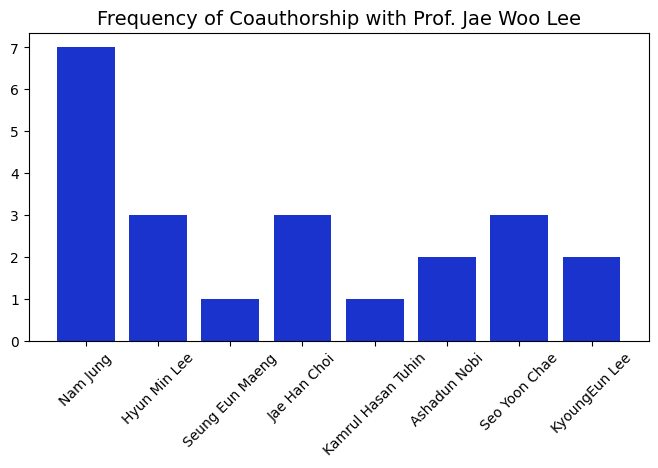

In [22]:
plt.figure(figsize=(8,4))
plt.bar(x=coauthors,height=coworks,color=(0.1,0.2,0.8))
plt.xticks(rotation=45)
plt.title('Frequency of Coauthorship with Prof. Jae Woo Lee',fontsize=14)
plt.show()

# Practice

In [23]:
import pandas as pd

In [28]:
data = pd.read_csv('population-and-demography.csv')
print(data.head)


<bound method NDFrame.head of       Country name  Year  Population  \
0      Afghanistan  1950     7480464   
1      Afghanistan  1951     7571542   
2      Afghanistan  1952     7667534   
3      Afghanistan  1953     7764549   
4      Afghanistan  1954     7864289   
...            ...   ...         ...   
18283     Zimbabwe  2017    14751101   
18284     Zimbabwe  2018    15052191   
18285     Zimbabwe  2019    15354606   
18286     Zimbabwe  2020    15669663   
18287     Zimbabwe  2021    15993525   

       Population of children under the age of 1  \
0                                       301735.0   
1                                       299368.0   
2                                       305393.0   
3                                       311574.0   
4                                       317584.0   
...                                          ...   
18283                                   464521.0   
18284                                   466524.0   
18285                

In [47]:
data

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population at age 1,Population aged 1 to 4 years,...,Population aged 15 to 19 years,Population aged 20 to 29 years,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,258652.02,946547.0,...,757113,1241348,909953,661807,467170,271905,92691,9499,123,0.0
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,254304.00,947489.0,...,768616,1260904,922765,667015,468881,273286,94358,10155,118,0.0
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,252906.00,942827.0,...,781411,1280288,935638,672491,470898,274852,96026,10721,139,0.0
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,258717.02,943151.0,...,794308,1298803,948321,678064,472969,276577,97705,11254,166,0.0
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,264765.00,950233.0,...,806216,1316768,961484,684153,475117,278210,99298,11793,190,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,Zimbabwe,2017,14751101,464521.0,2287404,6217928,9224369,8056253,457422.00,1822883.0,...,1690993,2422873,2021973,1088878,570769,467775,200927,59789,8974,222.0
18284,Zimbabwe,2018,15052191,466524.0,2283576,6291632,9385132,8264833,457587.00,1817052.0,...,1732035,2474502,2058928,1155537,585529,476214,208587,59700,9299,228.0
18285,Zimbabwe,2019,15354606,468844.0,2281740,6367398,9543409,8473475,459748.00,1812896.0,...,1759205,2546398,2085636,1220993,606266,479827,218763,60339,9546,235.0
18286,Zimbabwe,2020,15669663,470340.0,2287105,6449021,9709135,8691594,462625.00,1816765.0,...,1776240,2640150,2101852,1291333,631541,476507,231604,61546,9629,240.0


In [31]:
# Print the number of rows and columns
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 18288
Number of columns: 22


In [48]:
# Print the column names
data.columns

Index(['Country name', 'Year', 'Population',
       'Population of children under the age of 1',
       'Population of children under the age of 5',
       'Population of children under the age of 15',
       'Population under the age of 25', 'Population aged 15 to 64 years',
       'Population at age 1', 'Population aged 1 to 4 years',
       'Population aged 5 to 9 years', 'Population aged 10 to 14 years',
       'Population aged 15 to 19 years', 'Population aged 20 to 29 years',
       'Population aged 30 to 39 years', 'Population aged 40 to 49 years',
       'Population aged 50 to 59 years', 'Population aged 60 to 69 years',
       'Population aged 70 to 79 years', 'Population aged 80 to 89 years',
       'Population aged 90 to 99 years', 'Population older than 100 years'],
      dtype='object')

In [50]:
data.isna().sum()

Country name                                  0
Year                                          0
Population                                    0
Population of children under the age of 1     0
Population of children under the age of 5     0
Population of children under the age of 15    0
Population under the age of 25                0
Population aged 15 to 64 years                0
Population at age 1                           0
Population aged 1 to 4 years                  0
Population aged 5 to 9 years                  0
Population aged 10 to 14 years                0
Population aged 15 to 19 years                0
Population aged 20 to 29 years                0
Population aged 30 to 39 years                0
Population aged 40 to 49 years                0
Population aged 50 to 59 years                0
Population aged 60 to 69 years                0
Population aged 70 to 79 years                0
Population aged 80 to 89 years                0
Population aged 90 to 99 years          

In [52]:
data.describe()

,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population at age 1,Population aged 1 to 4 years,Population aged 5 to 9 years,...,Population aged 15 to 19 years,Population aged 20 to 29 years,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years
count,18288.000000,1.828800e+04,1.828800e+04,1.828800e+04,1.828800e+04,1.828800e+04,1.828800e+04,1.828800e+04,1.828800e+04,1.828800e+04,...,1.828800e+04,1.828800e+04,1.828800e+04,1.828800e+04,1.828800e+04,1.828800e+04,1.828800e+04,1.828800e+04,1.828800e+04,18288.000000
mean,1985.500000,1.264704e+08,3.133497e+06,1.482571e+07,4.109523e+07,6.376260e+07,7.742951e+07,3.011213e+06,1.169221e+07,1.359858e+07,...,1.178226e+07,2.087288e+07,1.715870e+07,1.362214e+07,1.017707e+07,6.801757e+06,3.618710e+06,1.195799e+06,1.427844e+05,3107.718068
std,20.783173,5.888512e+08,1.416701e+07,6.738437e+07,1.884170e+08,2.942519e+08,3.676519e+08,1.366200e+07,5.323824e+07,6.253431e+07,...,5.512604e+07,9.886099e+07,8.240460e+07,6.600822e+07,4.928848e+07,3.271292e+07,1.749154e+07,6.238308e+06,8.533504e+05,20951.566812
min,1950.000000,1.363000e+03,2.500000e+01,1.360000e+02,4.160000e+02,6.230000e+02,7.480000e+02,2.600000e+01,1.010000e+02,1.380000e+02,...,1.100000e+02,1.580000e+02,1.370000e+02,1.190000e+02,9.500000e+01,6.400000e+01,3.100000e+01,6.000000e+00,0.000000e+00,0.000000
25%,1967.750000,2.915915e+05,6.663750e+03,3.199525e+04,8.954150e+04,1.395415e+05,1.702635e+05,6.473750e+03,2.526925e+04,2.940625e+04,...,2.629650e+04,4.505075e+04,3.660825e+04,2.744025e+04,1.964975e+04,1.260300e+04,6.221000e+03,1.818750e+03,1.547500e+02,0.000000
50%,1985.500000,3.833998e+06,8.835200e+04,4.237845e+05,1.186122e+06,1.843100e+06,2.246772e+06,8.582400e+04,3.344540e+05,3.922205e+05,...,3.369695e+05,6.097235e+05,4.862905e+05,3.647125e+05,2.647815e+05,1.684175e+05,8.182400e+04,2.026950e+04,1.468500e+03,13.000000
75%,2003.250000,1.678546e+07,4.630005e+05,2.160046e+06,5.905945e+06,9.025130e+06,9.641250e+06,4.407875e+05,1.697851e+06,1.947261e+06,...,1.626211e+06,2.758738e+06,2.113149e+06,1.556334e+06,1.203386e+06,8.452428e+05,4.367100e+05,1.333805e+05,1.249900e+04,163.000000
max,2021.000000,7.909295e+09,1.397837e+08,6.903607e+08,2.015023e+09,3.239281e+09,5.132999e+09,1.384787e+08,5.509704e+08,6.836118e+08,...,6.235761e+08,1.210493e+09,1.165207e+09,9.764072e+08,8.513569e+08,5.980671e+08,3.304912e+08,1.318356e+08,2.222397e+07,593166.000000


In [73]:
# Print the World row
pop = data.loc[(data['Country name'] == 'World') & (data['Year'] == 2021)]
pop

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population at age 1,Population aged 1 to 4 years,...,Population aged 15 to 19 years,Population aged 20 to 29 years,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years
18071,World,2021,7909295000,131409180.0,671477300,2015023400,3239281000,5132999000,132442390.0,540068100.0,...,623560800,1194528500,1165207300,976407200,851356900,598067140,330491170,131835590,22223974,593166.0


In [ ]:
# Plot an histogram of the population of the world over the years
population=['Population
coworks=[]
for author in coauthors:
  coworks.append(c.count(author)) # counting frequencies
coworks